In [21]:
import yfinance as yf
import pandas as pd 
import numpy as np 
from pathlib import Path

In [22]:
cryptocurrencies = ['BTC-USD']
start_date = "2020-07-01"
end_date = "2021-07-31"
bitcoin_data = yf.download(cryptocurrencies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [23]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-07-27,37276.035156,39406.941406,36441.726562,39406.941406,39406.941406,35097370560
2021-07-28,39503.187500,40816.070312,38862.437500,39995.906250,39995.906250,38702404695
2021-07-29,39995.453125,40593.070312,39352.058594,40008.421875,40008.421875,27167146027


<AxesSubplot:xlabel='Date'>

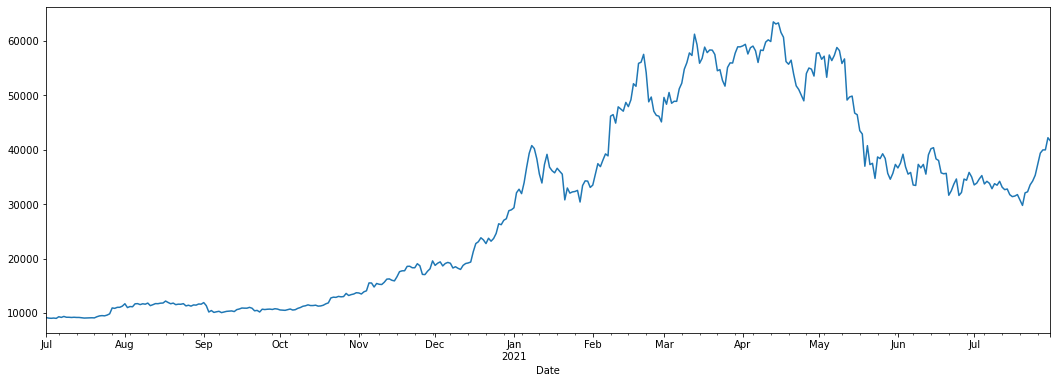

In [24]:
bitcoin_data["Close"].plot(figsize=(18,6))

In [25]:
y = bitcoin_data["Close"].pct_change().dropna()
y = (y > 0)
y.value_counts()
y = y.loc["2020-07-04":"2021-07-31"]
y

Date
2020-07-04     True
2020-07-05    False
2020-07-06     True
2020-07-07    False
2020-07-08     True
              ...  
2021-07-27     True
2021-07-28     True
2021-07-29     True
2021-07-30     True
2021-07-31    False
Name: Close, Length: 393, dtype: bool

In [26]:
X = bitcoin_data.shift(periods=2).dropna()
X = X.loc["2020-07-02":"2021-07-30"]
X

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-03,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,1.597155e+10
2020-07-04,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,1.633892e+10
2020-07-05,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,1.307897e+10
2020-07-06,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,1.229053e+10
2020-07-07,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,1.290341e+10
...,...,...,...,...,...,...
2021-07-26,33593.730469,34490.390625,33424.859375,34292.445312,34292.445312,2.166471e+10
2021-07-27,34290.292969,35364.925781,33881.835938,35350.187500,35350.187500,2.085669e+10
2021-07-28,35384.031250,40499.675781,35287.312500,37337.535156,37337.535156,5.102213e+10


In [27]:
num_test = 33
X_train = X[:-num_test]
y_train = y[:-num_test]
X_test = X[-num_test:]
y_test = y[-num_test:]

In [28]:
X.shape, y.shape

((393, 6), (393,))

In [29]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=17)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=17)

In [30]:
res = clf.predict(X_test)
acc = (res== y_test.values).mean()
print(acc)

0.5757575757575758


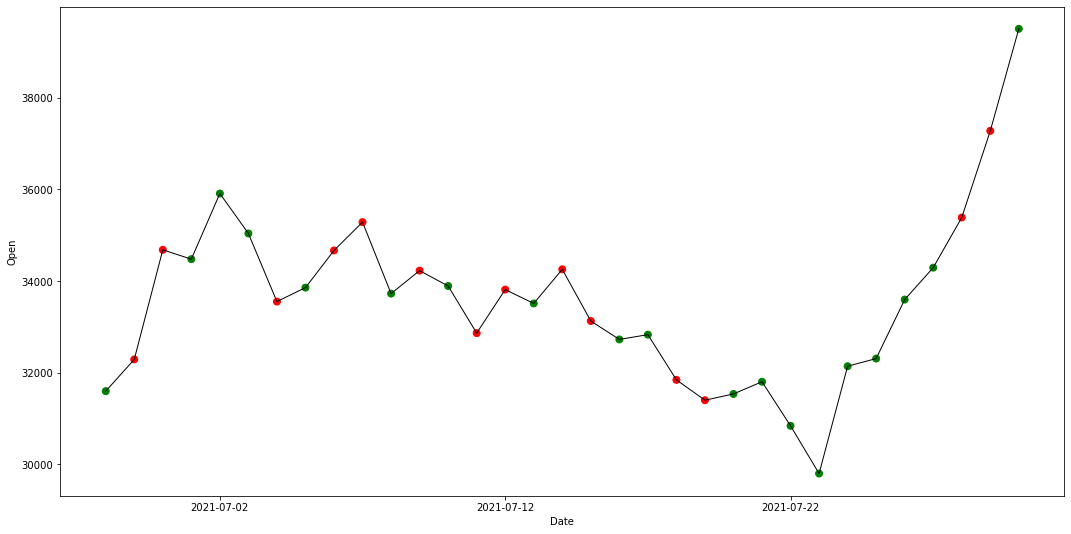

In [31]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test]

ax = plt.gca()
ax.plot(X_test['Open'],lw = 1, c = 'black')
X_test.reset_index().plot.scatter( x = 'Date', y = 'Open',color = colors,s = 48,ax= ax,figsize=(18,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, res))

              precision    recall  f1-score   support

       False       0.33      0.08      0.12        13
        True       0.60      0.90      0.72        20

    accuracy                           0.58        33
   macro avg       0.47      0.49      0.42        33
weighted avg       0.49      0.58      0.49        33



In [33]:
cryptocurrencies = ['BTC-USD']
start_date = "2020-01-01"
end_date = "2022-07-11"
bitcoin_data = yf.download(cryptocurrencies, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [34]:
bitcoin_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520
2022-07-08,21637.154297,22314.941406,21257.453125,21731.117188,21731.117188,49899834488
2022-07-09,21716.828125,21877.138672,21445.957031,21592.207031,21592.207031,29641127858


In [35]:
y = bitcoin_data["Close"].pct_change().dropna()
y = (y > 0)
y.value_counts()
y = y.loc["2021-01-05":"2022-07-01"]
y

Date
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
2021-01-09    False
              ...  
2022-06-27    False
2022-06-28    False
2022-06-29    False
2022-06-30    False
2022-07-01    False
Name: Close, Length: 543, dtype: bool

In [36]:
X = bitcoin_data.shift(periods=2).dropna()
X = X.loc["2021-01-04":"2022-06-30"]
X

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,6.786542e+10
2021-01-05,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,7.866524e+10
2021-01-06,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,8.116348e+10
2021-01-07,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,6.754732e+10
2021-01-08,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,7.528943e+10
...,...,...,...,...,...,...
2022-06-26,21084.648438,21472.917969,20777.511719,21231.656250,21231.656250,2.495778e+10
2022-06-27,21233.609375,21520.914062,20964.585938,21502.337891,21502.337891,1.837254e+10
2022-06-28,21496.494141,21783.724609,21016.269531,21027.294922,21027.294922,1.802717e+10


In [37]:
num_test = 33
X_train = X[:-num_test]
y_train = y[:-num_test]
X_test = X[-num_test:]
y_test = y[-num_test:]
y_train

Date
2021-01-05     True
2021-01-06     True
2021-01-07     True
2021-01-08     True
2021-01-09    False
              ...  
2022-05-25    False
2022-05-26    False
2022-05-27    False
2022-05-28     True
2022-05-29     True
Name: Close, Length: 510, dtype: bool

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=17)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=17)

In [39]:
res = clf.predict(X_test)
acc = (res== y_test.values).mean()
print(acc)

0.42424242424242425


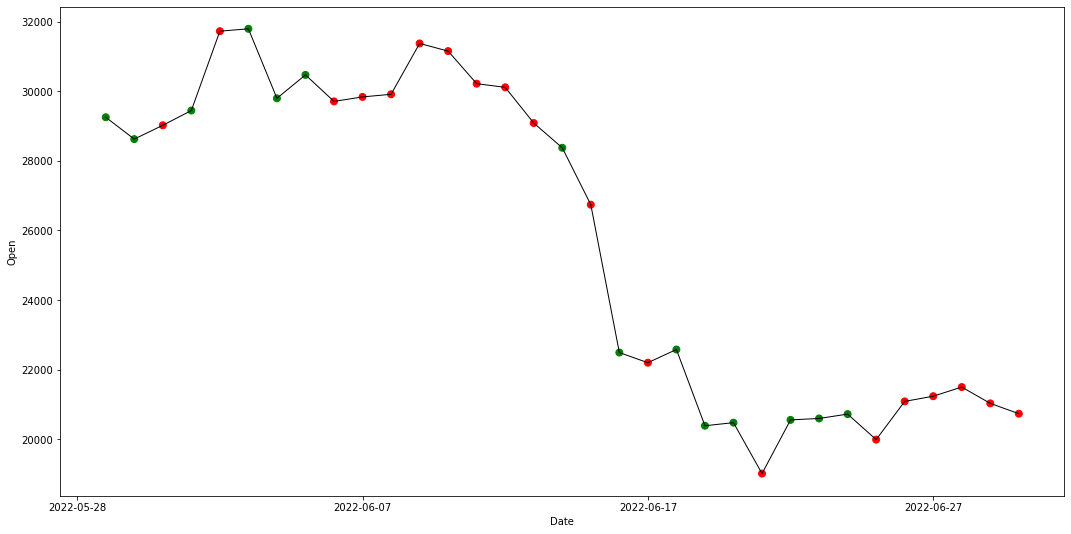

In [40]:
%matplotlib inline
import  matplotlib.pyplot as plt

colors = ['green' if x else 'red' for x in res== y_test]

ax = plt.gca()
ax.plot(X_test['Open'],lw = 1, c = 'black')
X_test.reset_index().plot.scatter( x = 'Date', y = 'Open',color = colors,s = 48,ax= ax,figsize=(18,9))
ax.xaxis.set_major_locator(plt.MaxNLocator(4))